In [1]:
from gensim.models import Word2Vec

from gensim.models.word2vec import LineSentence

import re

In [2]:
!pip install wikipedia-api





[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import wikipediaapi

user_agent = "MiProyectoFutbol/1.0 (contacto: elenaperez03m@gmail.com)"
wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language="es")

paginas = [
    "Fútbol", "Copa Mundial de Fútbol", "LaLiga", "Premier League",
    "Champions League", "Lionel Messi", "Cristiano Ronaldo"
]

corpus = ""

for pagina in paginas:
    page = wiki.page(pagina)
    if page.exists():
        corpus += page.text + "\n\n"  




In [4]:
sentences = re.split(r'[.!?]', corpus)  # Separar en oraciones
corpus = [re.findall(r'\b\w+\b', sentence.lower()) for sentence in sentences if sentence.strip()]


In [5]:
sg_params = {
          'vector_size' : 100,
          'window' : 5,
          'min_count' : 5,
          'sg' : 1,
          'hs' : 0,
          'negative' : 20,
          'compute_loss': True,
}

cbow_params = {
          'vector_size' : 100,
          'window' : 2,
          'min_count' : 5,
          'sg' : 0,
          'hs' : 0,
          'negative' : 20,
          'compute_loss': True,
}
#Skip Gram
w2v_sg = Word2Vec(** sg_params)
#CBOW
w2v_cbow = Word2Vec(** cbow_params)
# Entrenamiento
w2v_sg.build_vocab(corpus)
w2v_cbow.build_vocab(corpus)


w2v_sg.train(corpus, total_examples=w2v_sg.corpus_count, epochs=5)
w2v_cbow.train(corpus, total_examples=w2v_cbow.corpus_count, epochs=5)


w2v_sg.save('./w2v_sg_d100_mc5_w5.pkl')   # d=dimension, mc=min_count, w=window
w2v_cbow.save('./w2v_cbow_d100_mc5_w2.pkl')

In [6]:
w2v_cbow.wv.most_similar("españa")

[('francia', 0.9991345405578613),
 ('eliminatoria', 0.9991200566291809),
 ('luego', 0.9991028308868408),
 ('13', 0.9990901350975037),
 ('ganar', 0.9990490674972534),
 ('eliminado', 0.9989923238754272),
 ('italia', 0.9989854693412781),
 ('2005', 0.9989602565765381),
 ('regular', 0.9989568591117859),
 ('semifinales', 0.9989373087882996)]

In [7]:
w2v_sg.wv.most_similar("real")

[('atlético', 0.9090341925621033),
 ('madrid', 0.8887456059455872),
 ('c', 0.8650548458099365),
 ('bayern', 0.8320356011390686),
 ('f', 0.8313485383987427),
 ('athletic', 0.8258876204490662),
 ('emblema', 0.8183780312538147),
 ('arsenal', 0.8107661604881287),
 ('vencedor', 0.8099111914634705),
 ('milan', 0.8074014186859131)]

In [8]:
sg_params = {
          'vector_size' : 300,
          'window' : 5,
          'min_count' : 2,
          'sg' : 1,
          'hs' : 0,
          'negative' : 20,
          'compute_loss': True,
}

cbow_params = {
          'vector_size' : 300,
          'window' : 10,
          'min_count' : 5,
          'sg' : 0,
          'hs' : 0,
          'negative' : 20,
          'compute_loss': True,
}
#Skip Gram
w2v_sg = Word2Vec(** sg_params)
#CBOW
w2v_cbow = Word2Vec(** cbow_params)
# Entrenamiento
w2v_sg.build_vocab(corpus)
w2v_cbow.build_vocab(corpus)


w2v_sg.train(corpus, total_examples=w2v_sg.corpus_count, epochs=5)
w2v_cbow.train(corpus, total_examples=w2v_cbow.corpus_count, epochs=5)


w2v_sg.save('./w2v_sg_d300_mc2_w5.pkl')   # d=dimension, mc=min_count, w=window
w2v_cbow.save('./w2v_cbow_d300_mc5_w10.pkl')

In [9]:
w2v_sg.wv.most_similar("balón")

[('oro', 0.9563212990760803),
 ('premio', 0.9506630897521973),
 ('entregado', 0.8872762322425842),
 ('año', 0.8828414678573608),
 ('joven', 0.8792556524276733),
 ('fifa', 0.8665082454681396),
 ('mejor', 0.8625184893608093),
 ('recibió', 0.8615821003913879),
 ('argentino', 0.8589410781860352),
 ('bota', 0.8573614358901978)]

In [12]:
w2v_sg.wv.most_similar("madrid")

[('real', 0.9470176696777344),
 ('atlético', 0.9330642819404602),
 ('athletic', 0.8994981050491333),
 ('arsenal', 0.8963778018951416),
 ('chelsea', 0.8900335431098938),
 ('c', 0.8796308636665344),
 ('bayern', 0.8757897615432739),
 ('city', 0.866104781627655),
 ('vencer', 0.8627716302871704),
 ('emblema', 0.8617000579833984)]

In [23]:
model = Word2Vec.load("w2v_sg_d100_mc5_w5.pkl") 

def resolver_analogia(palabra1, palabra2, palabra3, modelo):
    try:
        resultado = modelo.wv.most_similar(positive=[palabra3, palabra2], negative=[palabra1], topn=1)
        palabra4, similitud = resultado[0]
        print(f"Analogía: {palabra1} - {palabra2} + {palabra3} = {palabra4} (Similitud: {similitud:.2f})")
        return palabra4
    except KeyError as e:
        print(f"¡Error! Palabra no encontrada en el vocabulario: {e}")
        return None

# Ejemplo de uso:
resolver_analogia("fútbol", "portero", "gol", model)

Analogía: fútbol - portero + gol = marcó (Similitud: 0.90)


'marcó'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


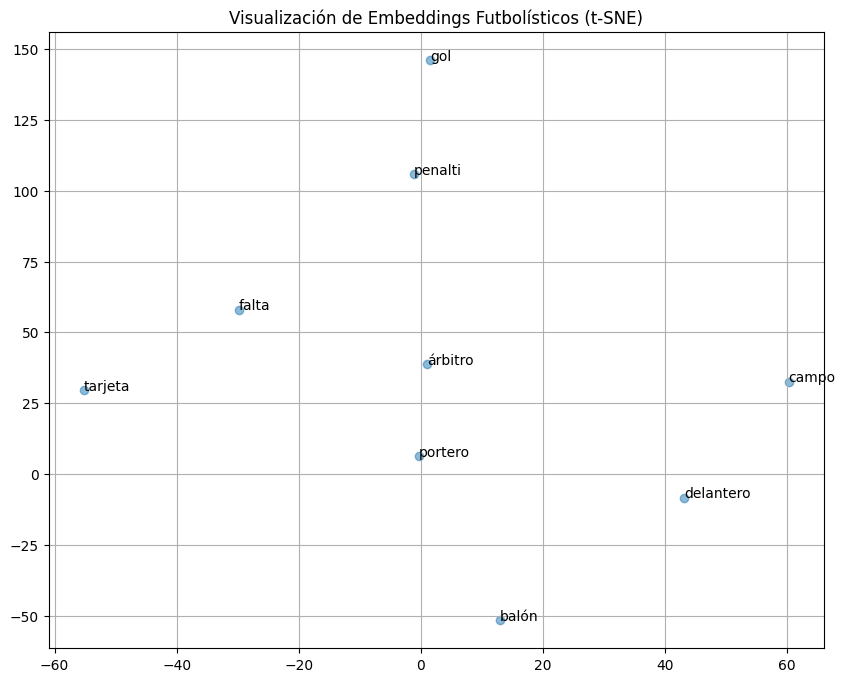

In [29]:
!pip install matplotlib
!pip install scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# 1. Cargar modelo entrenado
model = Word2Vec.load("w2v_sg_d100_mc5_w5.pkl")  

# 2. Seleccionar palabras a visualizar
palabras = ["balón", "gol", "portero", "delantero", "falta", 
            "árbitro", "penalti", "campo", "esquina", "tarjeta"]

# 3. Extraer vectores y filtrar palabras existentes
vectors = []
labels = []
for word in palabras:
    if word in model.wv:
        vectors.append(model.wv[word])
        labels.append(word)

# 4. Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
vectors_2d = tsne.fit_transform(np.array(vectors))

# 5. Graficar
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)

# Añadir etiquetas
for i, label in enumerate(labels):
    plt.annotate(label, (vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Visualización de Embeddings Futbolísticos (t-SNE)")
plt.grid()
plt.show()